# Algae transport Proof of Concept

Hei

$ \phi$

In [12]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import tqdm, os

In [13]:
#source_url = 'https://thredds.met.no/thredds/dodsC/fou-hi/norkyst800m-1h/NorKyst-800m_ZDEPTHS_his.an.2019071600.nc'
source_url = "https://thredds.met.no/thredds/dodsC/fou-hi/barents_eps_zdepth/barents_zdepth_20230319T00Zm00_AN.nc"
cached_file =  "netcdf_cache/barents_zdepth_20230319T00Zm00_AN.nc"
if os.path.isfile(cached_file):
    source_url = cached_file

In [14]:
ds = xr.open_dataset(source_url)
ds

<xarray.Dataset>
Dimensions:                  (time: 24, depth: 16, Y: 949, X: 739, s_rho: 42, s_w: 43)
Coordinates:
  * X                        (X) float32 2.786e+05 2.811e+05 ... 2.124e+06
  * Y                        (Y) float32 -8.979e+05 -8.954e+05 ... 1.472e+06
  * depth                    (depth) float64 0.0 3.0 10.0 ... 1e+03 2e+03 3e+03
    lat                      (Y, X) float64 ...
    lon                      (Y, X) float64 ...
  * time                     (time) datetime64[ns] 2023-03-19 ... 2023-03-19T...
Dimensions without coordinates: s_rho, s_w
Data variables: (12/21)
    AKs                      (time, depth, Y, X) float32 ...
    Cs_r                     (s_rho) float64 ...
    Cs_w                     (s_w) float64 ...
    Uwind                    (time, Y, X) float32 ...
    Vwind                    (time, Y, X) float32 ...
    angle                    (Y, X) float64 ...
    ...                       ...
    sea_mask                 (Y, X) float64 ...
    temperature              (time, depth, Y, X) float32 ...
    u                        (time, depth, Y, X) float32 ...
    v                        (time, depth, Y, X) float32 ...
    w                        (time, depth, Y, X) float32 ...
    zeta                     (time, Y, X) float32 ...
Attributes: (12/33)
    file:              /lustre/storeB/project/fou/hi/oper/barents_eps/rundir/...
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS history file
    title:             Barents-2.5km - ROMS
    var_info:          /home/havis/sea/ROMS/metroms_apps/barents-2.5km/includ...
    rst_file:          /lustre/storeB/project/fou/hi/oper/barents_eps/rundir/...
    ...                ...
    tiling:            003x036
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_sr...
    CPP_options:       BARENTS, ADD_FSOBC, ADD_M2OBC, ALBEDO, ANA_BSFLUX, ANA...
    DAinfo_EnKF:       \nDA_DAY            "6567.0 days since 1990-01-01"\nSS...
    history:           Sun Mar 19 07:31:28 2023: ncks -O -d time,0,23 /lustre...
    NCO:               netCDF Operators version 4.7.9 (Homepage = http://nco....

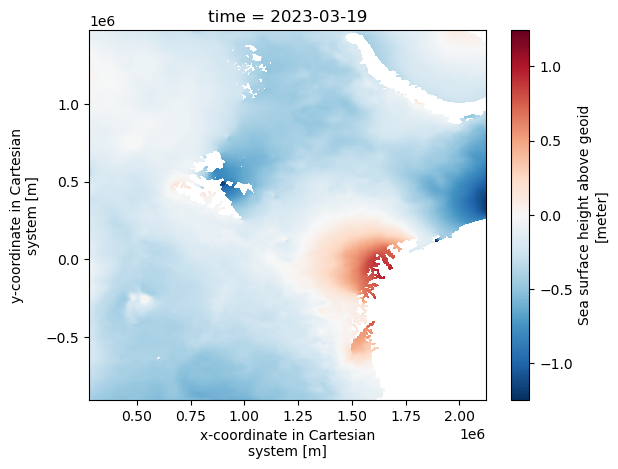

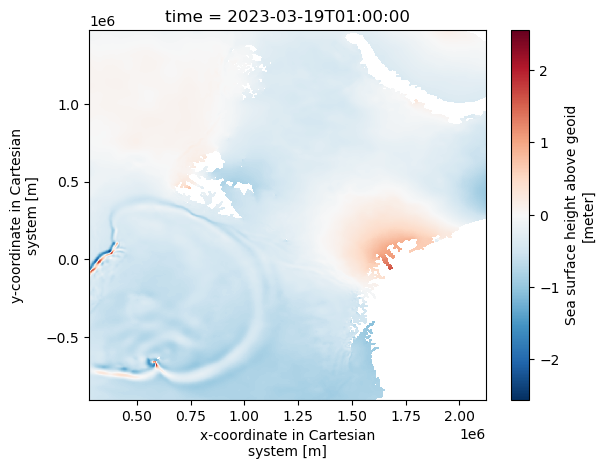

In [15]:
ds.zeta.isel(time=0).plot()
fig = plt.figure()
ds.zeta.isel(time=1).plot()

<class 'numpy.ndarray'>


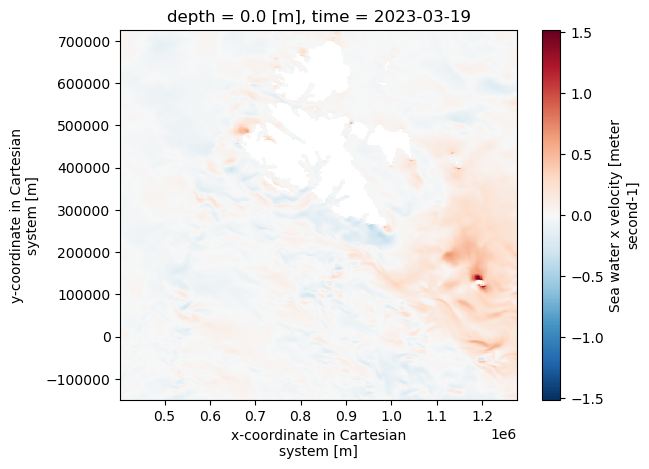

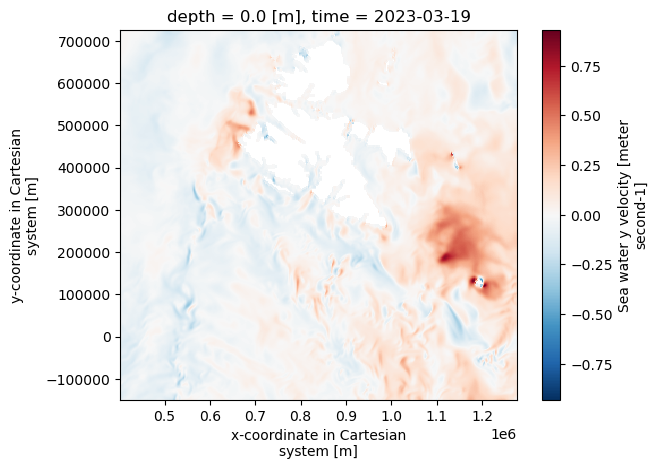

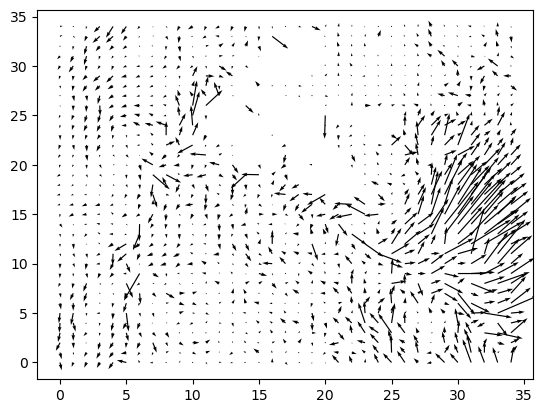

In [16]:
x0, x1 = 50, 400
y0, y1 = 300, 650


ds.u.isel(depth=0, time=0, X=slice(x0,x1), Y=slice(y0, y1)).plot()
plt.figure()
ds.v.isel(depth=0, time=0, X=slice(x0,x1), Y=slice(y0, y1)).plot()

print(type(ds.v.isel(depth=0, time=0, X=slice(x0,x1), Y=slice(y0, y1)).data))

plt.figure()
plt.quiver(ds.u.isel(depth=0, time=0, X=slice(x0,x1), Y=slice(y0, y1)).data[::10, ::10],
           ds.v.isel(depth=0, time=0, X=slice(x0,x1), Y=slice(y0, y1)).data[::10,::10])

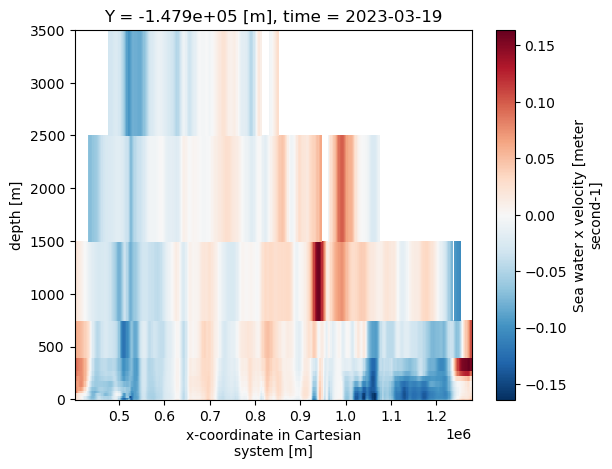

In [17]:
ds.u.isel(time=0, X=slice(x0,x1), Y=y0).plot()


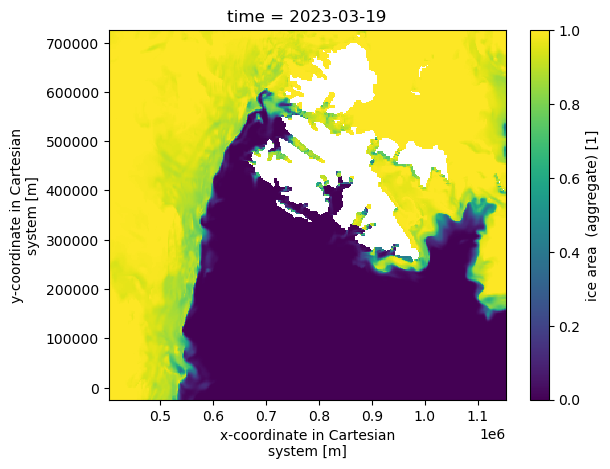

In [18]:
ds.ice_concentration.isel(time=0, X=slice(50,350), Y=slice(350,650)).plot()



<class 'numpy.ndarray'>


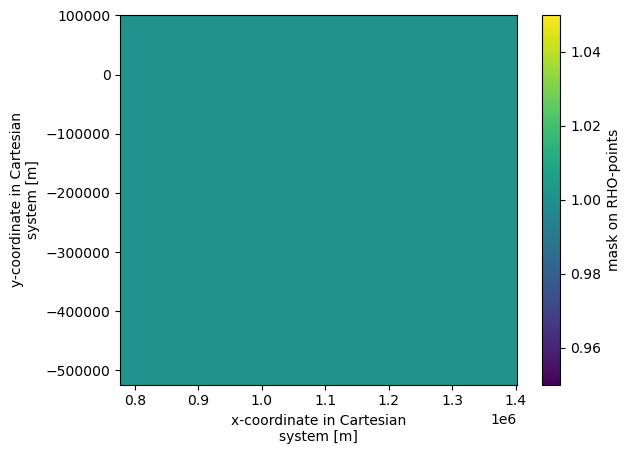

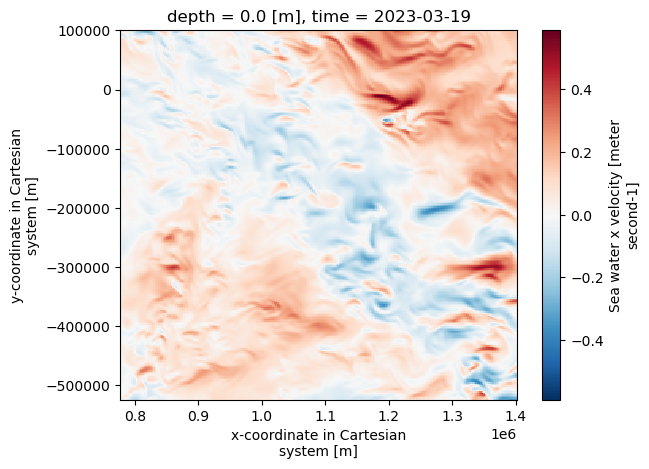

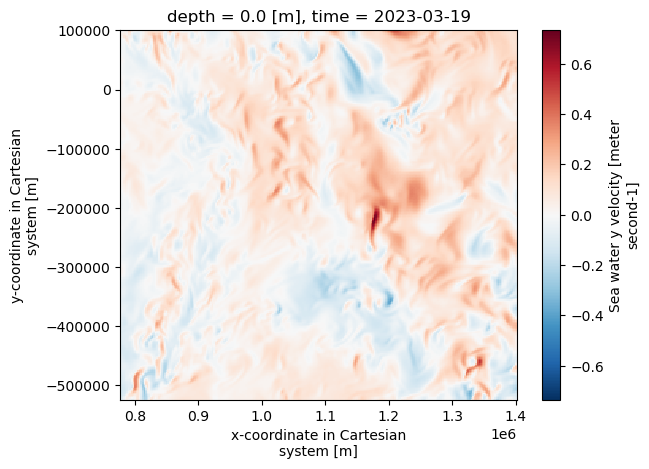

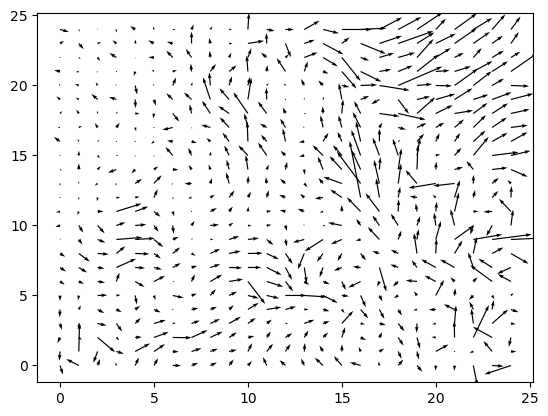

In [19]:
x0, x1 = 200, 450
y0, y1 = 150, 400


plt.figure()
ds.sea_mask.isel(X=slice(x0,x1), Y=slice(y0, y1)).plot()

plt.figure()

ds.u.isel(depth=0, time=0, X=slice(x0,x1), Y=slice(y0, y1)).plot()
plt.figure()
ds.v.isel(depth=0, time=0, X=slice(x0,x1), Y=slice(y0, y1)).plot()
print(type(ds.v.isel(depth=0, time=0, X=slice(x0,x1), Y=slice(y0, y1)).data))

plt.figure()
plt.quiver(ds.u.isel(depth=0, time=0, X=slice(x0,x1), Y=slice(y0, y1)).data[::10, ::10],
           ds.v.isel(depth=0, time=0, X=slice(x0,x1), Y=slice(y0, y1)).data[::10,::10])

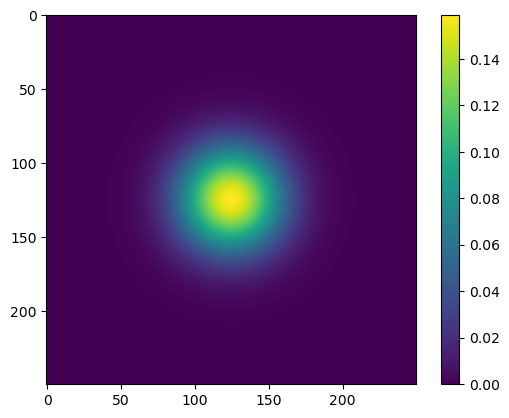

In [20]:
from scipy.stats import norm
x = np.linspace(-5,
                5, 250)
rv = norm()
#plt.plot(x, rv.pdf(x), 'k-', lw=2, )

init_c_x = rv.pdf(x)


init_c = np.outer(init_c_x, init_c_x)*1
plt.imshow(init_c)
plt.colorbar()

In [21]:
init_c.shape, ds.u.isel(depth=0, time=0, X=slice(x0,x1), Y=slice(y0, y1)).shape

((250, 250), (250, 250))

In [22]:
np.max(np.abs(ds.u.isel(depth=0, time=0, X=slice(x0,x1), Y=slice(y0, y1)).data))*24*3600

50875.24108886719

In [23]:
250*2400

600000

# Advection diffusion

In [24]:
u = ds.u.isel(depth=0, time=0, X=slice(x0,x1), Y=slice(y0, y1)).data
v = ds.v.isel(depth=0, time=0, X=slice(x0,x1), Y=slice(y0, y1)).data

init_c_sharp = np.zeros_like(init_c)
init_c_sharp[100:150, 100:150] = 1

In [25]:
def flux_x(u, c):
    u_face = 0.5*(u[:, :-1] + u[:, 1:])
    u_p = np.maximum(u_face, np.zeros_like((u_face)))
    u_m = np.minimum(u_face, np.zeros_like((u_face)))

    F = u_p * c[:, :-1] + u_m * c[:, 1:]
    return F

def flux_y(u, c):
    u_face = 0.5*(u[:-1, :] + u[1:, :])
    u_p = np.maximum(u_face, np.zeros_like((u_face)))
    u_m = np.minimum(u_face, np.zeros_like((u_face)))

    F = u_p * c[:-1, :] + u_m * c[1:, :]
    return F


def advect(u, v, c, dx, dy):
    f_x = (flux_x(u[1:-1, 1:], c[1:-1, 1:]) - flux_x(u[1:-1, :-1], c[1:-1, :-1])) / dx
    f_y = (flux_y(v[1:, 1:-1], c[1:, 1:-1]) - flux_y(v[:-1, 1:-1], c[:-1, 1:-1])) / dy

    return f_x + f_y

def diffusion(c, dx, dy, D):
    return D* ((c[1:-1, 0:-2] - 2*c[1:-1, 1:-1] + c[1:-1, 2:])/(dx**2) + 
               (c[0:-2, 1:-1] - 2*c[1:-1, 1:-1] + c[2:, 1:-1])/(dy**2) )
    

def solve(c, u, v, dx, dy, D, T, scale_cfl=1):

    ny, nx = c.shape
    
    DX = 1/nx
    DY = 1/ny

    scale = DX/dx
    u = scale*u
    v = scale*v
    print("scale", scale)

    max_u = np.max(np.sqrt(u*u))
    max_v = np.max(np.sqrt(v*v))

    dt_adv = min(0.5*min(DX/max_u, DY/max_v), 3600)
    dt_diff = dt_adv
    if D > 0:
        dt_diff = scale_cfl*min(DX**2/D, DY**2/D)

    dt = min(dt_adv, dt_diff)

    print("dt: ", dt, (dt_adv, dt_diff))    
    num_steps = T / dt
    for t in tqdm.tqdm(range(int(num_steps))):
        c[1:-1, 1:-1] = c[1:-1, 1:-1] - dt*advect(u, v, c, DX, DY) + dt*diffusion(c, DX, DY, D)

        if np.any(np.isinf(c)) or np.any(np.isneginf(c)) or np.any(np.isnan(c)):
            raise Exception(f"We got nan or inf at t={t}.")


    return c



c:\Users\havardh\Miniconda3\envs\gpuocean-extra\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in true_divide


scale 0.00016666666666666666
dt:  3600 (3600, 3600)


0it [00:00, ?it/s]


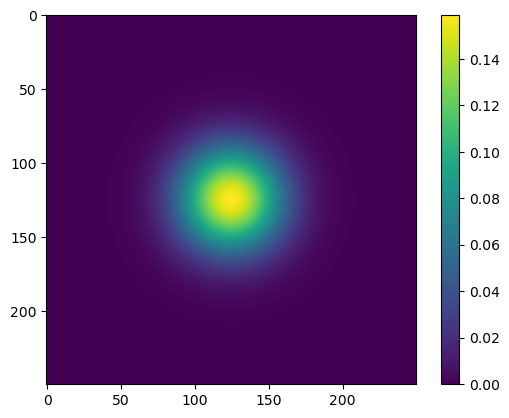

In [27]:

final_c = solve(np.copy(init_c), np.zeros_like(u), np.zeros_like(v), 24, 24,T=10, D=0.000)

plt.imshow(final_c)
plt.colorbar()

In [28]:
np.sum(init_c), np.sum(final_c)

(620.0093606550311, 620.0093606550311)

scale 1.6666666666666667e-06
dt:  1633.768694939457 (1633.768694939457, 1633.768694939457)


100%|██████████| 52/52 [00:01<00:00, 49.50it/s]


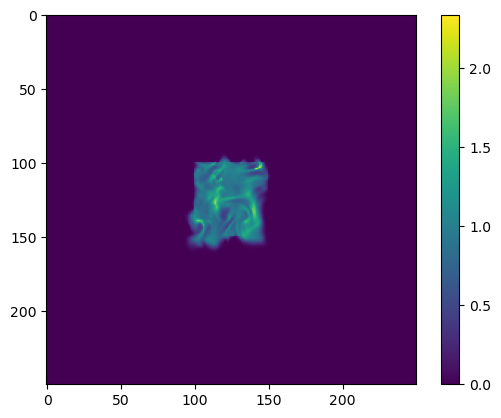

In [29]:
final_c = solve(np.copy(init_c_sharp), u, v, 2400, 2400, T=24*3600, D=0.000, scale_cfl=0.4)

plt.imshow(final_c)
plt.colorbar()

# Lagrangian

In [225]:
x = np.random.uniform(low=(100*2400, 100*2400), high=(150*2400, 150*2400), size=(10000,2))

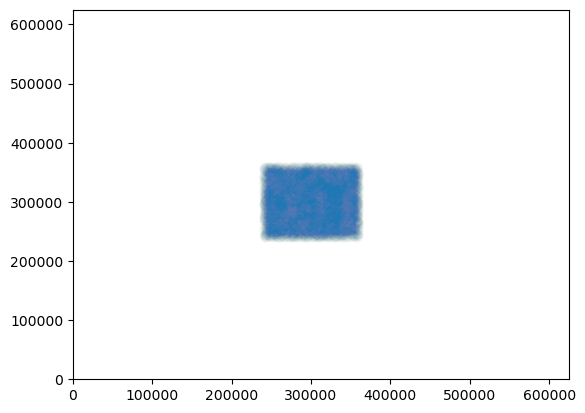

In [253]:
def pltLagrangian(x):
    plt.scatter(x[:, 0], x[:,1], alpha=0.006)
    plt.xlim(0, 250*2500)
    plt.ylim(0, 250*2500)
pltLagrangian(x)

In [229]:
from scipy.interpolate import RegularGridInterpolator

class LagrangeRHS:

    def __init__(self,  dx, dy, interpolatoru, interpolatorv):
    
        self.dx = dx
        self.dy = dy

        self.ny, self.nx = u.shape

        self.interpolatorv = interpolatorv
        self.interpolatoru = interpolatoru

    def __call__(self, p, _):
        try:
            # AHACK!!!
            uatpt = self.interpolatoru(p)
            vatpt = self.interpolatorv(p)
        except:
            return np.zeros_like(p)
        return np.array([vatpt, uatpt]).flatten()

def make_rhs(u, v, dx=2400, dy=2400):
    ny, nx = u.shape
    ymesh = np.linspace(0.5*dy, (ny+0.5) * dy, ny)
    xmesh = np.linspace(0.5*dx, (nx+0.5) * dx, nx)

    interpolatoru = RegularGridInterpolator((xmesh, ymesh), u, fill_value=0.0)
    interpolatorv = RegularGridInterpolator((xmesh, ymesh), v, fill_value=0.0)

    return LagrangeRHS(dx, dy, interpolatoru,interpolatorv)

In [204]:
rhs = make_rhs(u, v)
rhs(x[0,:])

array([[-0.00780156],
       [-0.05488138]])

In [215]:
from scipy.integrate import odeint
rhs = make_rhs(u, v)
y0 =  x[0,:].flatten()
print(y0)
print(rhs(y0, 0.0))
result = odeint(rhs, y0, np.linspace(0, 24*3600, 24))

[248672.60320649 316907.26308692]
[-0.00780156 -0.05488138]


100%|██████████| 10000/10000 [00:42<00:00, 236.28it/s]


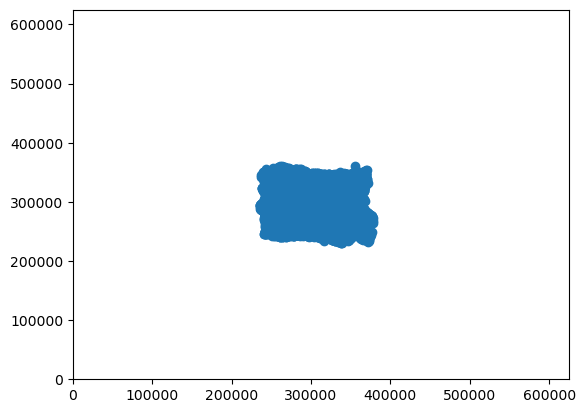

In [230]:
x = np.random.uniform(low=(100*2400, 100*2400), high=(150*2400, 150*2400), size=(10000,2))
final_positions = np.zeros_like(x)
rhs = make_rhs(u, v)

for n in tqdm.tqdm(range(x.shape[0])):
    y0 = x[n,:].flatten()
    final_positions[n,:] = odeint(rhs, y0, np.linspace(0, 24*3600, 24), rtol=1e-1)[-1]


In [241]:
from scipy.stats import gaussian_kde
z = gaussian_kde(final_positions)(final_positions)
plt.scatter(final_positions[:,1], final_positions[:,1], c=z)

LinAlgError: 2-th leading minor of the array is not positive definite

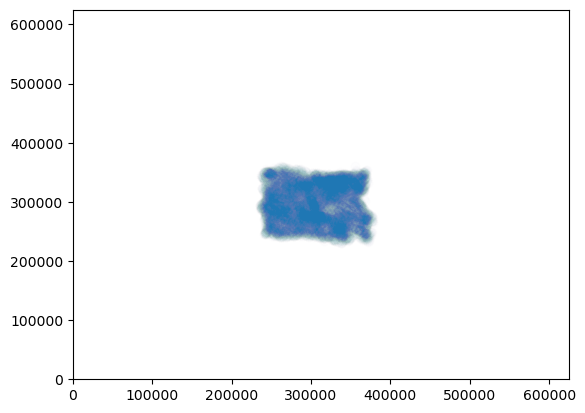

In [250]:
pltLagrangian(final_positions)

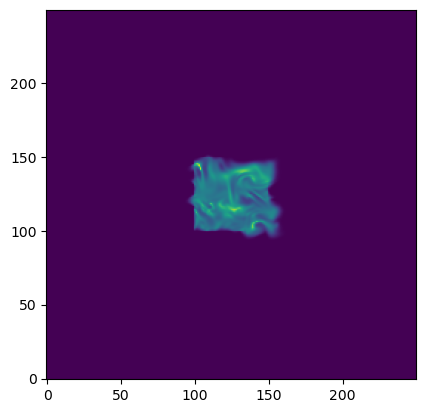

In [251]:
plt.imshow(final_c.T, origin="lower")

In [220]:
x

array([[248672.60320649, 316907.26308692],
       [344475.60826865, 317782.48077091],
       [305638.61302553, 313211.52864846],
       ...,
       [276423.99011362, 346665.49302062],
       [244366.66027325, 267512.08155498],
       [344618.65914094, 246336.44686273]])

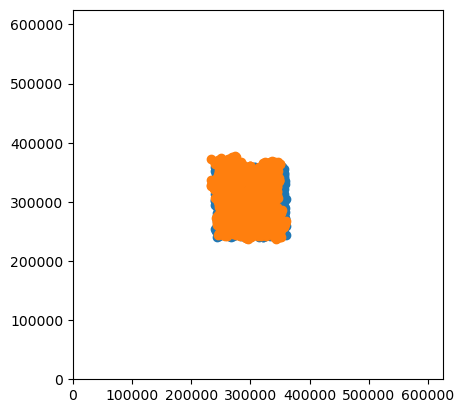

In [221]:
plt.imshow(final_c)
pltLagrangian(x)
plt.scatter(final_positions[:,1], final_positions[:,0])

In [32]:
2*200*200*144/(1024*1024)

10.986328125

3601.924104756815